In [1]:
# import dlux
import dLuxToliman as dlT

import dLux as dl
import dLux.utils as dlu
import numpy as np
from matplotlib import pyplot as plt

# optical system

# plt.imshow(mask,origin='lower')
# plt.xlim(0,100)
# plt.ylim(0,100)
# print(mask)

oSys = dlT.TolimanOpticalSystem(psf_npixels=1024,psf_pixel_scale=0.375,oversample=1,wf_npixels=4*1024)
# print(oSys)
# psf = oSys.model(point)
# dlT.telescopes.Toliman.osys
# # plotting
# plt.imshow(np.log10(psf **0.5), cmap='inferno',origin='lower')
# plt.title('Toliman log(root(psf))')
# # plt.xlim(1600, 1750)
# # plt.ylim(300, 450)
# plt.colorbar()
# plt.show()


In [1]:
#DEPTH NANOMETERS
#PERIOD MICRONS
dlT.optical_systems.TolimanSpikes

NameError: name 'dlT' is not defined

In [162]:
spikeSys = dlT.optical_systems.TolimanSpikes(wf_npixels=4096,psf_pixel_scale=0.375,psf_npixels=4096,grating_depth=(dlu.phase2opd(0.348*np.pi,585e-9)*1e9),grating_period=304)

In [163]:
print(spikeSys)

TolimanSpikes(
  wf_npixels=4096,
  diameter=0.125,
  layers={
    'aperture':
    TransmissiveLayer(transmission=f32[4096,4096], normalise=True),
    'pupil':
    AberratedLayer(opd=f32[4096,4096], phase=None)
  },
  psf_npixels=4096,
  oversample=2,
  psf_pixel_scale=0.375,
  grating_depth=101.78999999999999,
  grating_period=304,
  spike_npixels=512
)


In [2]:
aptr = oSys.aperture.transmission
pupl = oSys.pupil.opd

In [3]:
# plotting
# need to make the sinusoidal grating
wf_npix=2*2048
diameter=0.125 # from TOLIMAN telescope
coords = dlu.pixel_coords(wf_npix, diameter)
# print(coords)
# Create coordinate arrays
x = np.arange(wf_npix)
y = np.arange(wf_npix)
X, Y = np.meshgrid(x, y, indexing='ij')  # 'ij' ensures correct shape
# print(X)

# Compute the function
# peak to peak is 0.348 pi (vertical), amplitude is half
# since we have two waves have to half it again after summing them

# wavelength is 304 micrommeters, which is really small. need massive wavefront for decent modelling
diff = 0.348/2*np.pi * np.sin((X+Y)*2*np.pi*1/(wf_npix*(304e-6)/diameter))
diff += 0.348/2*np.pi * np.sin((X-Y)*2*np.pi*1/(wf_npix*(304e-6)/diameter))
diff = diff/2

#convert to relevant optical path diffence
diff_opd = dlu.phase2opd(diff,585e-9)

# invert when pupil is other phase

diff_opd[pupl > np.max(pupl)/2] *= -1
#inversion
# so aperture is just an array
layers = [
    (
        'aperture', dl.layers.TransmissiveLayer(transmission=aptr)
    ),

    (
        'pupil', dl.layers.AberratedLayer(opd=pupl)
    ),

    (
        'grating', dl.layers.AberratedLayer(opd=diff_opd)
    )
]

newerSystem = dl.AngularOpticalSystem(wf_npix, diameter, layers, psf_npixels=4*1024, psf_pixel_scale=0.375, oversample=1)
print(newerSystem)


AngularOpticalSystem(
  wf_npixels=4096,
  diameter=0.125,
  layers={
    'aperture':
    TransmissiveLayer(transmission=f32[4096,4096], normalise=False),
    'pupil':
    AberratedLayer(opd=f32[4096,4096], phase=None),
    'grating':
    AberratedLayer(opd=f32[4096,4096], phase=None)
  },
  psf_npixels=4096,
  oversample=1,
  psf_pixel_scale=0.375
)


In [1]:
wavelengths = np.linspace(530e-9,640e-9,12)
position = dlu.arcsec2rad(np.array([0,0]))
flux = 1e4 #(10,000 photons)
point = dl.PointSource(wavelengths, position, flux)

# kernel likes to crash if you have too many wavelengths
# maybe do a lot of my simulation on a less computationally intensive setup
# then transition to the actual conditions. / translate the code
newerPsf = newerSystem.model(point)

NameError: name 'np' is not defined

In [12]:
print(newerPsf)

: 

In [174]:
print(wf_npix*(304e-6)/diameter)

9.961472


In [143]:
304e-6/diameter

0.002432

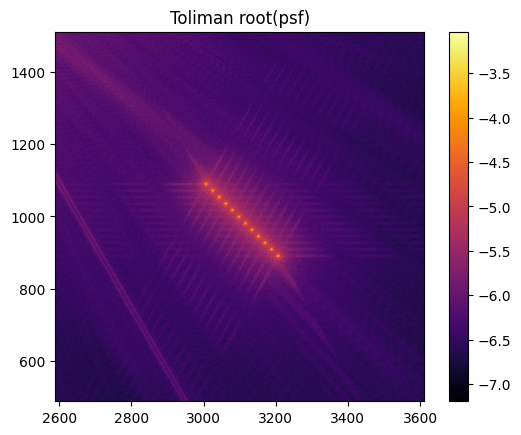

In [10]:
plt.imshow(np.log10(newerPsf**0.5), cmap='inferno',origin='lower')
plt.title('Toliman root(psf)')
cx = 3100
cy = 1000
r=512
plt.xlim(cx-r,cx+r)
plt.ylim(cy-r,cy+r)
plt.colorbar()
plt.show()

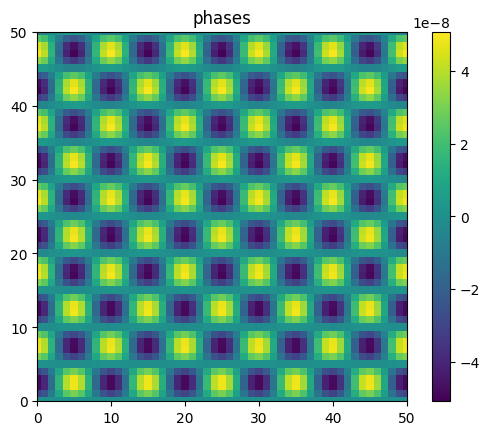

In [171]:
plt.imshow(diff_opd,origin='lower')
plt.title('phases')
plt.xlim(0,50)
plt.ylim(0,50)
plt.colorbar()
plt.show()

2.925e-07


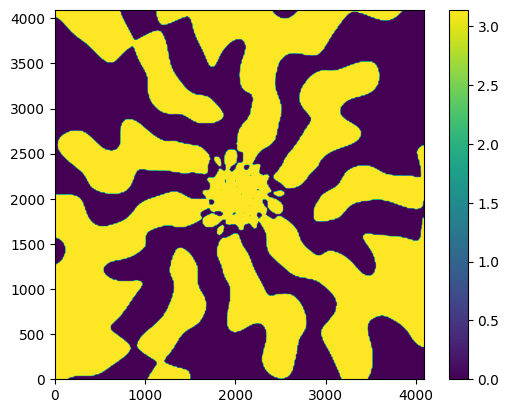

In [140]:
print(np.max(pupl))
puplphase = dlu.opd2phase(pupl,585e-9)
plt.imshow(puplphase, origin='lower')
plt.colorbar()
plt.show()


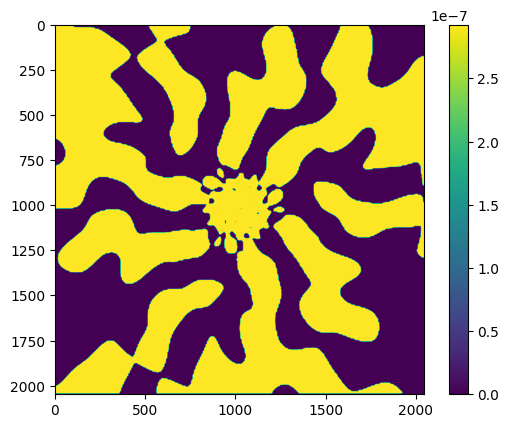

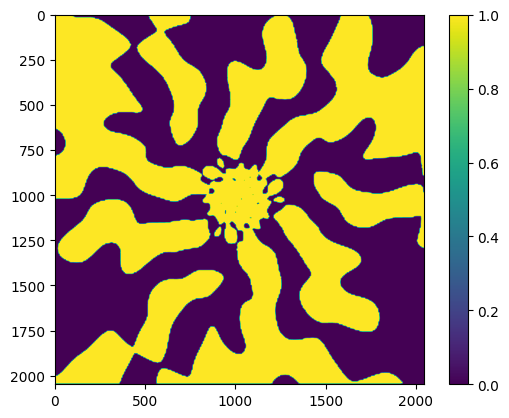

In [48]:

plt.imshow(oSys.pupil.opd)
plt.colorbar()
plt.show()
plt.imshow(diff_mask)
plt.colorbar()
plt.show()

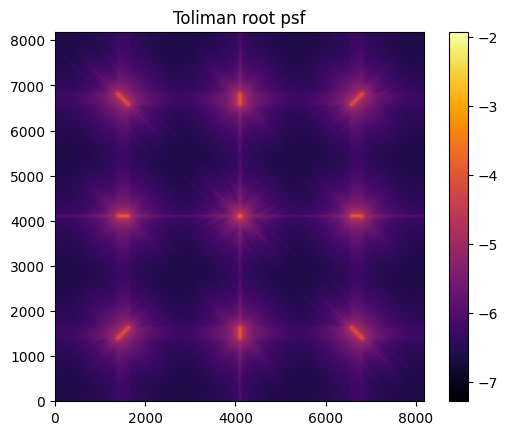

In [90]:
diff_mask = np.load('diffractive_pupil.npy')
layers = [
    (
        "aperture",
        dl.layers.TransmissiveLayer(
            transmission=diff_mask,
            # normalise=True
        ),
    ),

]

newSystem = dl.AngularOpticalSystem(psf_npixels=128*16,psf_pixel_scale=0.375,oversample=4,layers=layers,wf_npixels=128*16,diameter=1)

psf_new = newSystem.model(point)

plt.imshow(np.log10(psf_new **0.5), cmap='inferno',origin='lower')
plt.title('Toliman root psf')
# plt.xlim(1600, 1750)
# plt.ylim(300, 450)
plt.colorbar()
plt.show()

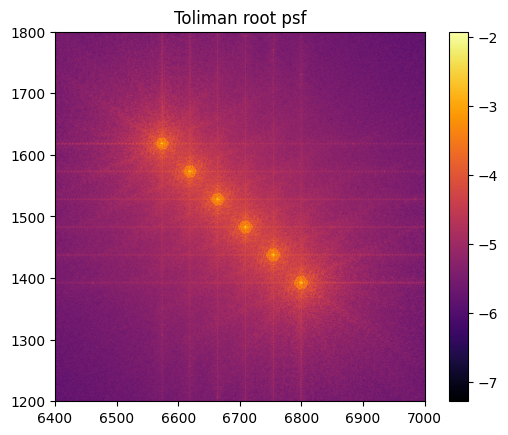

In [91]:
plt.imshow(np.log10(psf_new **0.5), cmap='inferno',origin='lower')
plt.title('Toliman root psf')
plt.xlim(4*1600, 4*1750)
plt.ylim(4*300, 4*450)
plt.colorbar()
plt.show()